In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv("data_car.csv")
ds.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
ds.shape

(11914, 16)

In [4]:
ds.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# Finding the missing value columns

ds.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
#Filling the Missing Values 

a = ds["Engine HP"].mean()
ds['Engine HP'].fillna(a,inplace=True)

b = ds["Engine Cylinders"].mean()
ds['Engine Cylinders'].fillna(b,inplace=True)

c = ds["Number of Doors"].mean()
ds['Number of Doors'].fillna(c,inplace=True)

d = ds["Engine Fuel Type"].mode()
ds['Engine Fuel Type']=ds['Engine Fuel Type'].fillna("regular unleaded")

e = ds["Market Category"].mode()
ds['Market Category']=ds['Market Category'].fillna("Crossover")

In [8]:
ds.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

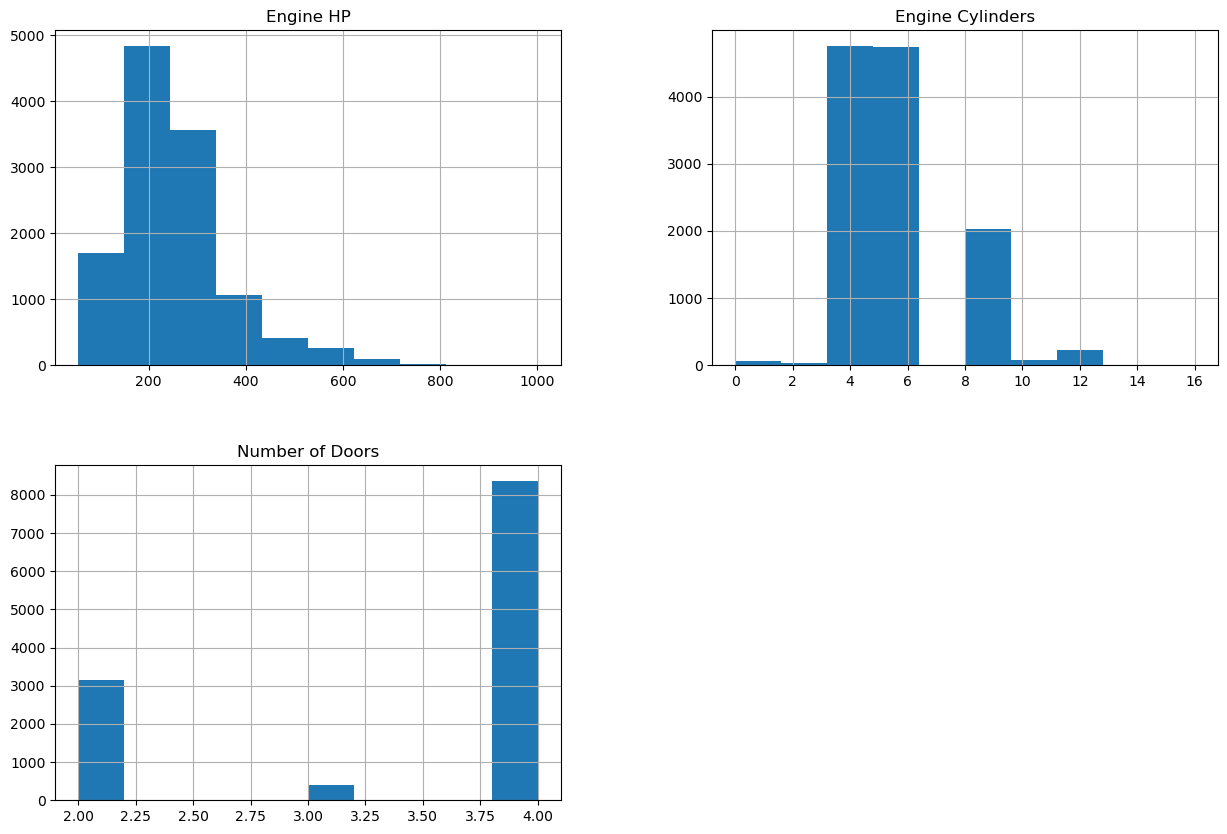

In [9]:
freqgraph=ds.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,10))
plt.show()

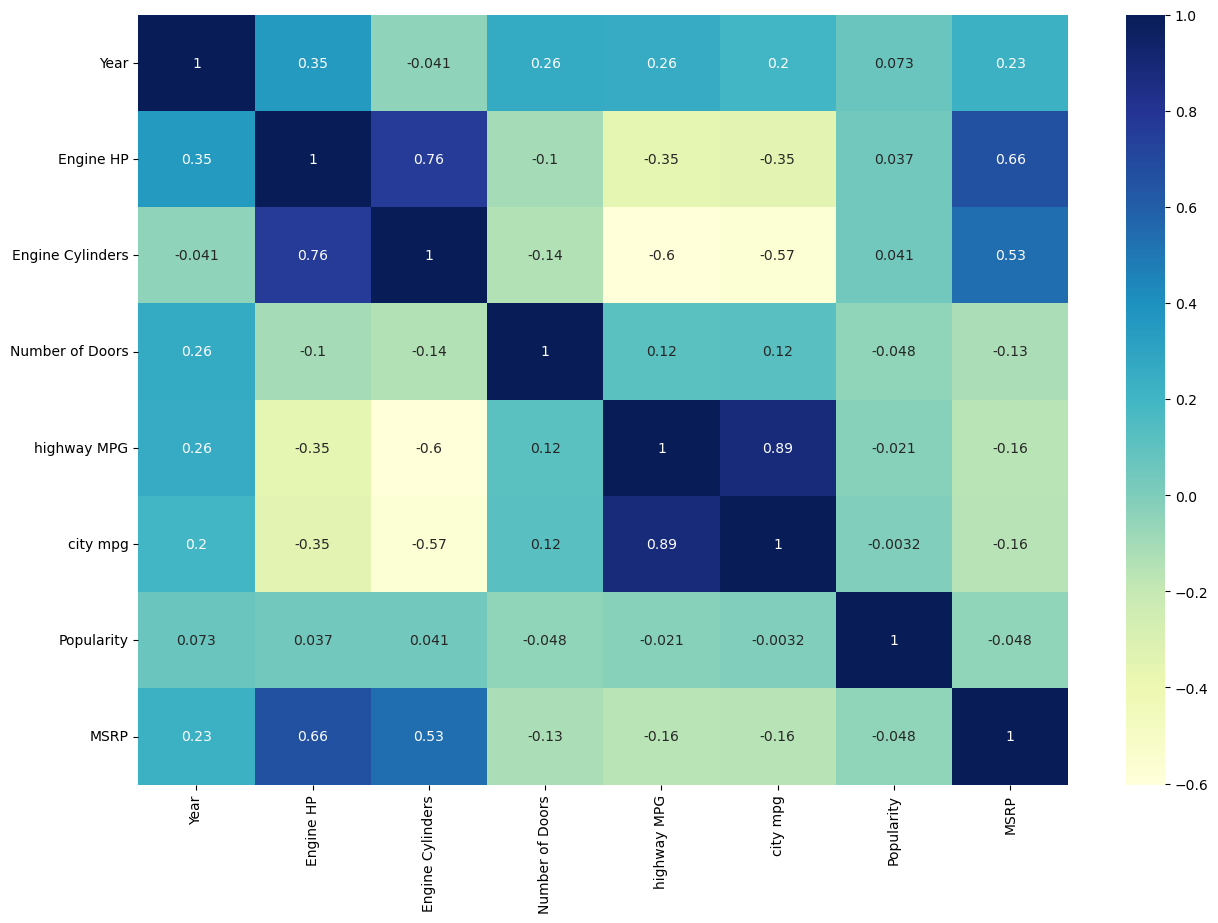

In [10]:
corrmatrix=ds.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')
plt.show()

## Data Preprocessing

In [11]:
# Converting categorical values into Numeric

# Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
ds['Make']=le.fit_transform(ds['Make'])
ds['Model']=le.fit_transform(ds['Model'])
ds['Engine Fuel Type']=le.fit_transform(ds['Engine Fuel Type'])
ds['Transmission Type']=le.fit_transform(ds['Transmission Type'])
ds['Driven_Wheels']=le.fit_transform(ds['Driven_Wheels'])
ds['Market Category']=le.fit_transform(ds['Market Category'])
ds['Vehicle Size']=le.fit_transform(ds['Vehicle Size'])
ds['Vehicle Style']=le.fit_transform(ds['Vehicle Style'])

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int32  
 1   Model              11914 non-null  int32  
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  int32  
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  int32  
 7   Driven_Wheels      11914 non-null  int32  
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  int32  
 10  Vehicle Size       11914 non-null  int32  
 11  Vehicle Style      11914 non-null  int32  
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int32(8

### Outlier Detection

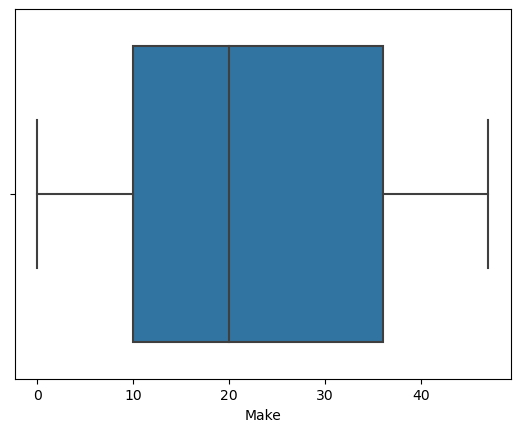

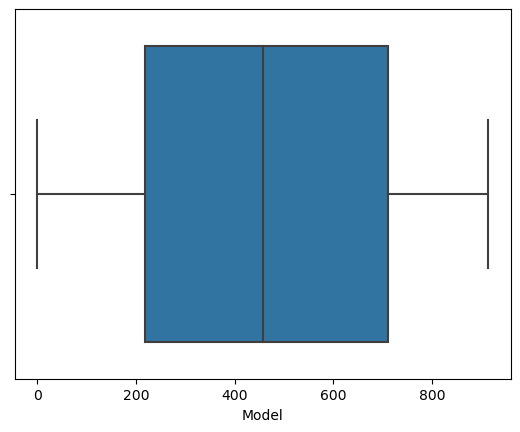

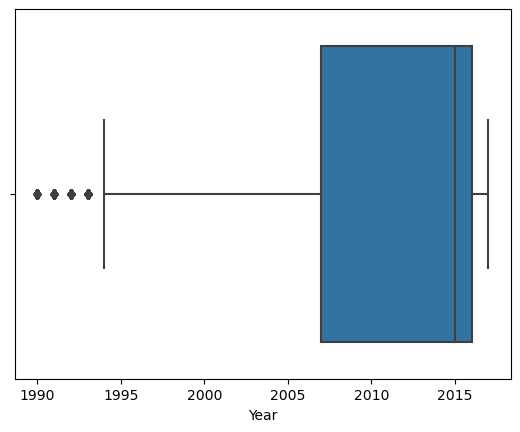

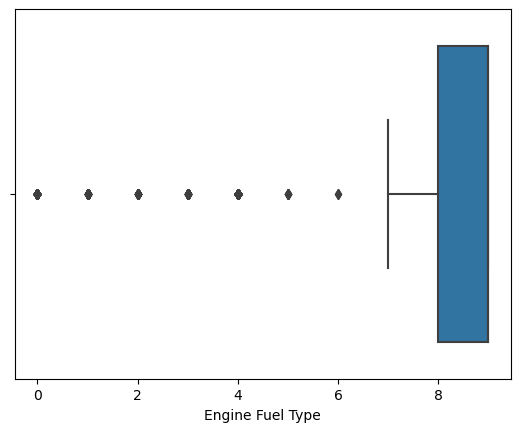

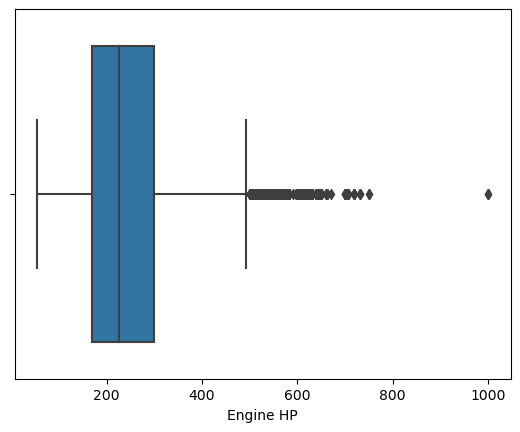

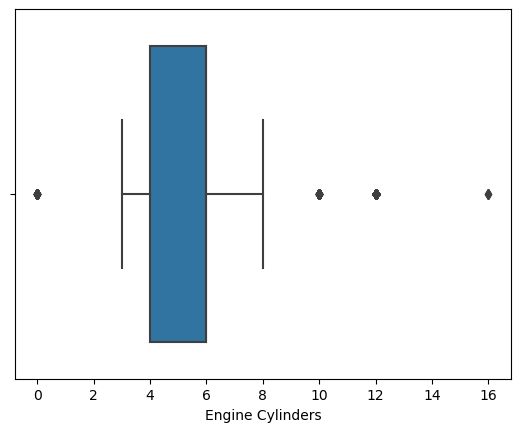

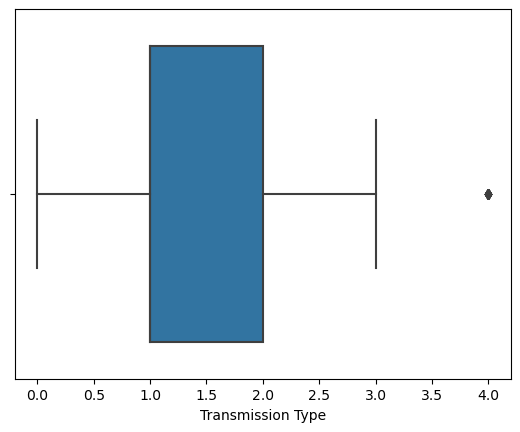

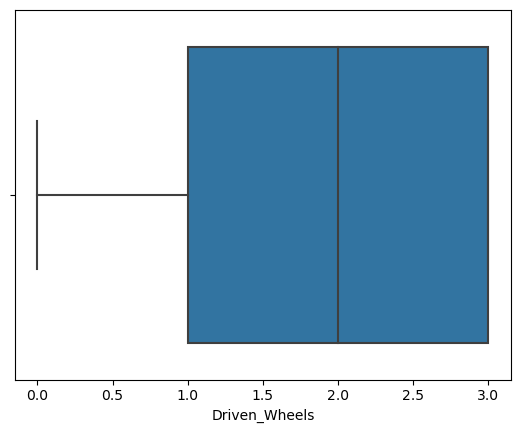

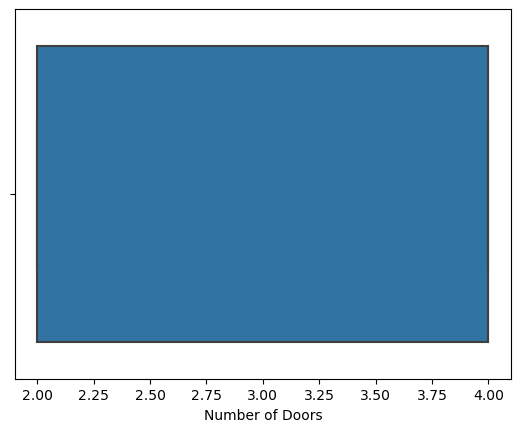

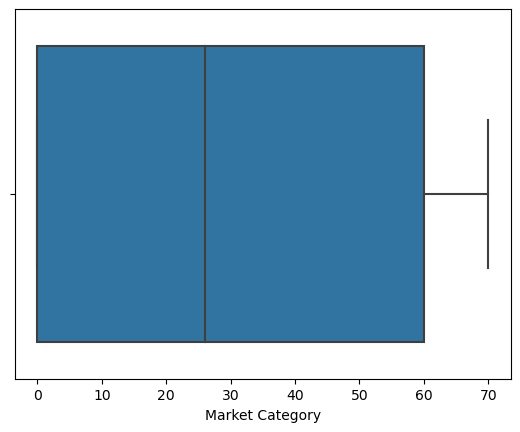

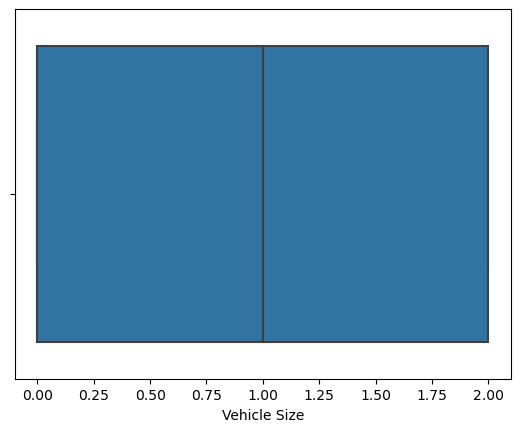

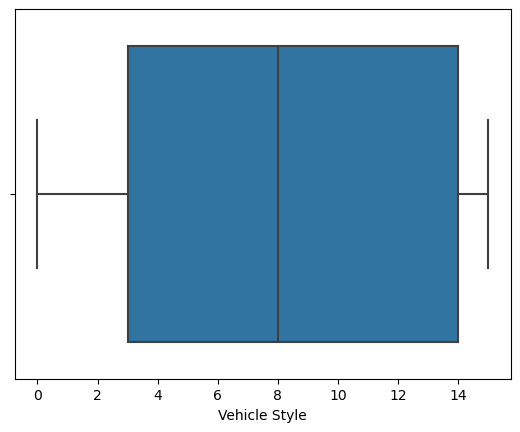

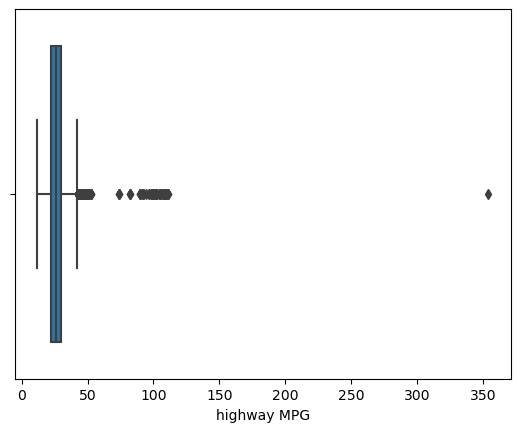

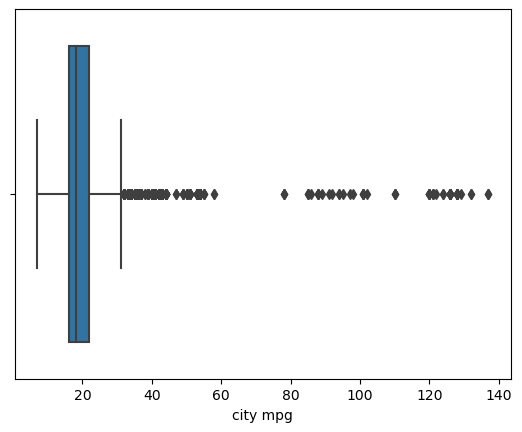

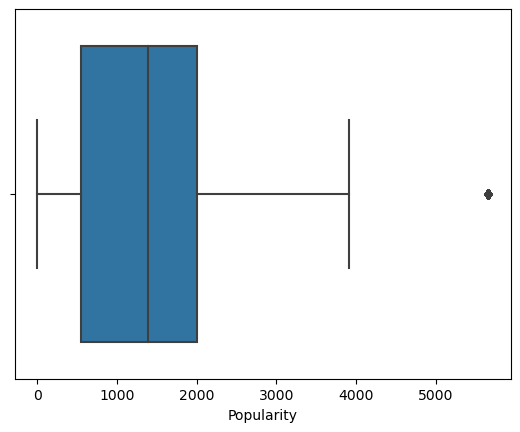

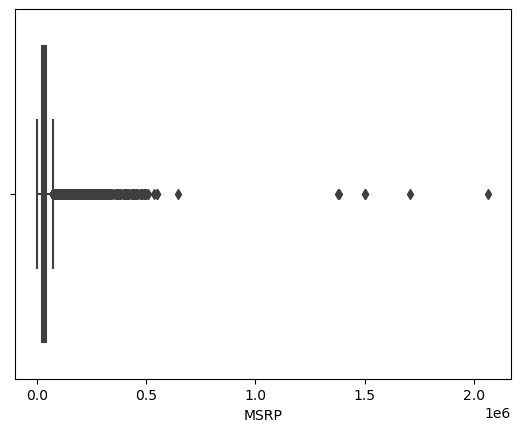

In [14]:
for i in ds:
    sns.boxplot(x=ds[i])
    plt.show()

In [15]:
#Outlier Contains the columns are Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, highway MPG, city mpg, Popularity, MSRP,  

In [27]:
# remove spaces from column names for Outlier Detection
ds.columns = ds.columns.str.replace(" ", "")

In [28]:
ds.head(5)

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


In [29]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  int32  
 1   Model             11914 non-null  int32  
 2   Year              11914 non-null  int64  
 3   EngineFuelType    11914 non-null  int32  
 4   EngineHP          11914 non-null  float64
 5   EngineCylinders   11914 non-null  float64
 6   TransmissionType  11914 non-null  int32  
 7   Driven_Wheels     11914 non-null  int32  
 8   NumberofDoors     11914 non-null  float64
 9   MarketCategory    11914 non-null  int32  
 10  VehicleSize       11914 non-null  int32  
 11  VehicleStyle      11914 non-null  int32  
 12  highwayMPG        11914 non-null  int64  
 13  citympg           11914 non-null  int64  
 14  Popularity        11914 non-null  int64  
 15  MSRP              11914 non-null  int64  
dtypes: float64(3), int32(8), int64(5)
memory

### Treating Outliers

### 1. Year

In [23]:
from scipy import stats

IQR=stats.iqr(ds.Year,interpolation='midpoint')
IQR

7.0

In [24]:
Q1=ds.Year.quantile(0.25)
Q3=ds.Year.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1998.5, 2026.5)

In [25]:
ds.loc[ds.Year<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
27,3,2,1994,9,172.0,6.0,1,2,4.0,63,2,15,21,16,3105,2000
28,3,2,1994,9,172.0,6.0,3,0,4.0,63,2,14,22,16,3105,2000
29,3,2,1994,9,172.0,6.0,3,2,4.0,63,2,14,22,17,3105,2000
30,3,2,1994,9,172.0,6.0,1,2,4.0,63,2,14,22,16,3105,2000
31,3,2,1994,9,172.0,6.0,1,0,4.0,63,2,15,21,16,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11478,43,868,1997,9,95.0,4.0,3,1,2.0,0,0,1,26,22,481,2000
11479,43,868,1997,9,95.0,4.0,3,3,2.0,0,0,1,26,22,481,2000
11480,43,868,1998,9,95.0,4.0,3,1,2.0,0,0,1,26,22,481,2000
11481,43,868,1998,9,95.0,4.0,3,1,2.0,0,0,1,26,22,481,2000


In [19]:
ds.loc[ds.Year>max_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [20]:
ds.loc[ds['Year']<min_limit,'Year']=np.median(ds.Year)

In [21]:
ds.loc[ds.Year<min_limit]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


### 2. Engine Fuel Type

In [30]:
IQR=stats.iqr(ds.EngineFuelType,interpolation='midpoint')
IQR

1.0

In [31]:
Q1=ds.EngineFuelType.quantile(0.25)
Q3=ds.EngineFuelType.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(6.5, 10.5)

In [32]:
ds.loc[ds.EngineFuelType<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
64,10,7,2015,4,184.0,4.0,1,2,4.0,41,2,14,36,23,1013,25170
65,10,7,2015,4,184.0,4.0,1,2,4.0,41,2,14,36,23,1013,23950
66,10,7,2015,4,295.0,6.0,1,0,4.0,48,2,14,29,18,1013,29370
67,10,7,2015,4,184.0,4.0,1,2,4.0,41,2,14,36,23,1013,21995
68,10,7,2015,4,184.0,4.0,1,2,4.0,48,2,14,36,23,1013,26625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,15,893,2016,4,355.0,8.0,1,1,4.0,48,1,3,22,16,549,60000
11876,15,893,2017,4,355.0,8.0,1,3,4.0,48,1,3,23,16,549,57315
11877,15,893,2017,4,355.0,8.0,1,1,4.0,48,1,3,22,16,549,51530
11879,15,893,2017,4,355.0,8.0,1,1,4.0,48,1,3,22,16,549,60315


In [33]:
ds.loc[ds.EngineFuelType>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [35]:
ds.loc[ds['EngineFuelType']<min_limit,'EngineFuelType']=np.median(ds.EngineFuelType)

In [36]:
ds.loc[ds.EngineFuelType<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 3. Engine HP

In [37]:
IQR=stats.iqr(ds.EngineHP,interpolation='midpoint')
IQR

130.0

In [38]:
Q1=ds.EngineHP.quantile(0.25)
Q3=ds.EngineHP.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-25.0, 495.0)

In [39]:
ds.loc[ds.EngineHP<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [40]:
ds.loc[ds.EngineHP>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
466,13,29,2013,8,562.0,8.0,0,3,2.0,30,0,6,17,13,2774,257412
467,13,29,2013,8,562.0,8.0,0,3,2.0,30,0,8,17,13,2774,233509
468,13,29,2014,8,562.0,8.0,0,3,2.0,30,0,8,17,13,2774,233509
469,13,29,2014,8,597.0,8.0,0,3,2.0,30,0,8,17,13,2774,288000
470,13,29,2014,8,562.0,8.0,0,3,2.0,30,0,6,17,13,2774,257412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11509,4,873,2016,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,98800
11510,4,873,2017,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,98800
11523,4,875,2015,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,102100
11524,4,875,2016,8,567.0,8.0,1,0,4.0,4,2,3,19,14,3916,102200


In [41]:
ds.loc[ds['EngineHP']>max_limit,'EngineHP']=np.median(ds.EngineHP)

In [42]:
ds.loc[ds.EngineHP>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 4. Engine Cylinders

In [43]:
IQR=stats.iqr(ds.EngineCylinders,interpolation='midpoint')
IQR

2.0

In [44]:
Q1=ds.EngineCylinders.quantile(0.25)
Q3=ds.EngineCylinders.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.0, 9.0)

In [45]:
ds.loc[ds.EngineCylinders<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
539,12,39,2015,9,249.38607,0.0,2,2,2.000000,50,0,0,108,122,819,31800
540,12,39,2016,9,249.38607,0.0,2,2,2.000000,50,0,0,103,121,819,31800
541,12,39,2017,9,249.38607,0.0,2,2,2.000000,50,0,0,103,121,819,31800
1680,31,133,2015,9,177.00000,0.0,2,2,4.000000,57,0,2,82,85,617,41450
1681,31,133,2016,9,177.00000,0.0,2,2,4.000000,57,0,2,82,85,617,41450
1682,31,133,2017,9,177.00000,0.0,2,2,4.000000,57,0,2,82,85,617,39900
4705,18,354,2013,9,249.38607,0.0,2,2,4.000000,50,0,2,105,132,2202,36625
4706,18,354,2014,9,249.38607,0.0,2,2,4.000000,50,0,2,105,132,2202,36625
4785,14,359,2015,9,249.38607,0.0,2,2,4.000000,50,0,2,99,110,5657,29170
4789,14,359,2016,9,249.38607,0.0,2,2,4.000000,50,0,2,99,110,5657,29170


In [46]:
ds.loc[ds.EngineCylinders>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
460,13,28,2001,8,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,223970
461,13,28,2001,8,442.0,12.0,3,3,2.0,30,0,8,15,9,2774,219775
462,13,28,2002,8,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,228625
463,13,28,2002,8,442.0,12.0,3,3,2.0,30,0,8,15,9,2774,224585
464,13,28,2003,8,442.0,12.0,1,3,2.0,30,0,8,14,9,2774,228625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,2,861,2012,8,490.0,12.0,1,3,2.0,30,2,8,18,13,259,208295
11395,2,861,2012,8,490.0,12.0,1,3,2.0,30,2,6,18,13,259,223295
11448,38,867,2014,8,227.0,12.0,1,3,2.0,32,1,8,21,13,86,284900
11449,38,867,2015,8,227.0,12.0,1,3,2.0,32,1,8,21,13,86,294025


In [47]:
ds.loc[ds['EngineCylinders']<min_limit,'EngineCylinders']=np.median(ds.EngineCylinders)
ds.loc[ds['EngineCylinders']>max_limit,'EngineCylinders']=np.median(ds.EngineCylinders)

In [48]:
ds.loc[ds.EngineCylinders<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [49]:
ds.loc[ds.EngineCylinders>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 5. Transmission Type

In [50]:
IQR=stats.iqr(ds.TransmissionType,interpolation='midpoint')
IQR

1.0

In [51]:
Q1=ds.TransmissionType.quantile(0.25)
Q3=ds.TransmissionType.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.5, 3.5)

In [52]:
ds.loc[ds.TransmissionType<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [53]:
ds.loc[ds.TransmissionType>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
1289,34,102,1997,9,150.0,4.0,4,2,2.0,0,2,8,29,19,26,2000
1290,34,102,1997,9,150.0,4.0,4,2,4.0,0,2,14,29,19,26,2000
4691,36,352,2000,9,305.0,8.0,4,3,2.0,60,2,0,23,15,210,6175
4692,36,352,2000,9,305.0,8.0,4,3,2.0,54,2,0,23,15,210,8548
4693,36,352,2000,9,305.0,8.0,4,3,2.0,40,2,6,23,15,210,9567
6158,15,464,1999,9,190.0,6.0,4,3,2.0,0,0,1,19,14,549,2182
6160,15,464,1999,9,190.0,6.0,4,1,2.0,0,0,1,19,14,549,2317
6165,15,464,2000,9,190.0,6.0,4,3,2.0,0,0,1,20,15,549,2407
6174,15,464,2000,9,190.0,6.0,4,1,2.0,0,0,1,18,14,549,2578
6366,10,492,2015,9,100.0,4.0,4,2,2.0,0,0,8,26,21,1013,2000


In [54]:
ds.loc[ds['TransmissionType']>max_limit,'TransmissionType']=np.median(ds.TransmissionType)

In [55]:
ds.loc[ds.TransmissionType>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 6. highway MPG

In [56]:
IQR=stats.iqr(ds.highwayMPG,interpolation='midpoint')
IQR

8.0

In [57]:
Q1=ds.highwayMPG.quantile(0.25)
Q3=ds.highwayMPG.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.0, 42.0)

In [58]:
ds.loc[ds.highwayMPG<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [59]:
ds.loc[ds.highwayMPG>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
135,4,12,2015,9,180.00000,4.0,1,3,4.0,24,2,14,45,32,3916,39000
140,4,12,2015,9,180.00000,4.0,1,0,4.0,24,2,15,43,31,3916,43450
142,4,12,2015,9,180.00000,4.0,1,0,4.0,24,2,14,43,31,3916,41000
539,12,39,2015,9,249.38607,6.0,2,2,2.0,50,0,0,108,122,819,31800
540,12,39,2016,9,249.38607,6.0,2,2,2.0,50,0,0,103,121,819,31800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,9,770,2014,9,140.00000,6.0,2,2,4.0,50,0,2,109,128,1385,27010
9869,9,770,2015,9,140.00000,6.0,2,2,4.0,50,0,2,109,128,1385,25170
9870,9,770,2015,9,140.00000,6.0,2,2,4.0,50,0,2,109,128,1385,25560
9871,9,770,2016,9,140.00000,6.0,2,2,4.0,50,0,2,109,128,1385,25510


In [60]:
ds.loc[ds['highwayMPG']>max_limit,'highwayMPG']=np.median(ds.highwayMPG)

In [62]:
ds.loc[ds.highwayMPG>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 7. city mpg

In [63]:
IQR=stats.iqr(ds.citympg,interpolation='midpoint')
IQR

6.0

In [64]:
Q1=ds.citympg.quantile(0.25)
Q3=ds.citympg.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(7.0, 31.0)

In [65]:
ds.loc[ds.citympg<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [66]:
ds.loc[ds.citympg>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
135,4,12,2015,9,180.00000,4.0,1,3,4.0,24,2,14,26,32,3916,39000
146,4,12,2016,9,180.00000,4.0,1,3,4.0,24,2,14,42,32,3916,39850
161,4,12,2017,9,180.00000,4.0,1,3,4.0,24,2,14,42,32,3916,40250
539,12,39,2015,9,249.38607,6.0,2,2,2.0,50,0,0,26,122,819,31800
540,12,39,2016,9,249.38607,6.0,2,2,2.0,50,0,0,26,121,819,31800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792,29,827,2008,9,133.00000,4.0,1,2,4.0,15,0,3,30,34,586,27995
10795,29,827,2008,9,133.00000,4.0,1,2,4.0,15,0,3,30,34,586,25485
10796,29,827,2009,9,177.00000,4.0,1,2,4.0,15,0,3,31,34,586,29175
10797,29,827,2009,9,177.00000,4.0,1,2,4.0,15,0,3,31,34,586,31695


In [67]:
ds.loc[ds['citympg']>max_limit,'citympg']=np.median(ds.citympg)

In [68]:
ds.loc[ds.citympg>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 8. Popularity

In [69]:
IQR=stats.iqr(ds.Popularity,interpolation='midpoint')
IQR

1460.0

In [70]:
Q1=ds.Popularity.quantile(0.25)
Q3=ds.Popularity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1641.0, 4199.0)

In [71]:
ds.loc[ds.Popularity<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [72]:
ds.loc[ds.Popularity>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
1331,14,107,1995,9,135.0,6.0,1,3,3.0,0,2,4,22,16,5657,2000
1332,14,107,1995,9,135.0,6.0,1,3,3.0,0,2,11,22,15,5657,2000
1333,14,107,1995,9,155.0,6.0,1,0,3.0,0,1,11,18,14,5657,2000
1334,14,107,1995,9,135.0,6.0,1,3,3.0,0,1,11,22,15,5657,2000
1335,14,107,1996,9,140.0,6.0,1,3,3.0,0,2,11,21,15,5657,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,14,865,2003,9,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,23070
11444,14,865,2003,9,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,26315
11445,14,865,2003,9,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,29230
11446,14,865,2003,9,200.0,6.0,1,2,4.0,0,2,11,22,16,5657,34825


In [73]:
ds.loc[ds['Popularity']>max_limit,'Popularity']=np.median(ds.Popularity)

In [74]:
ds.loc[ds.Popularity>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


### 9. MSRP

In [75]:
IQR=stats.iqr(ds.MSRP,interpolation='midpoint')
IQR

21227.5

In [76]:
Q1=ds.MSRP.quantile(0.25)
Q3=ds.MSRP.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-10841.25, 74072.5)

In [77]:
ds.loc[ds.MSRP<min_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


In [78]:
ds.loc[ds.MSRP>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP
294,13,22,2002,8,400.0,8.0,3,3,2.0,30,0,6,15,10,2774,160829
295,13,22,2002,8,400.0,8.0,3,3,2.0,30,0,8,15,10,2774,140615
296,13,22,2002,8,400.0,8.0,0,3,2.0,30,0,8,15,10,2774,150694
297,13,22,2002,8,400.0,8.0,0,3,2.0,30,0,6,15,10,2774,170829
298,13,22,2003,8,400.0,8.0,3,3,2.0,30,0,6,15,10,2774,165986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11736,8,884,2008,9,320.0,8.0,1,3,2.0,63,0,6,24,15,1624,85650
11737,8,884,2009,7,320.0,8.0,1,3,2.0,63,0,6,24,15,1624,86215
11903,4,900,2001,8,394.0,8.0,3,3,2.0,32,0,6,19,12,3916,128000
11904,4,900,2002,8,394.0,8.0,3,3,2.0,32,0,6,19,12,3916,130000


In [79]:
ds.loc[ds['MSRP']>max_limit,'MSRP']=np.median(ds.MSRP)

In [80]:
ds.loc[ds.MSRP>max_limit]

,Make,Model,Year,EngineFuelType,EngineHP,EngineCylinders,TransmissionType,Driven_Wheels,NumberofDoors,MarketCategory,VehicleSize,VehicleStyle,highwayMPG,citympg,Popularity,MSRP


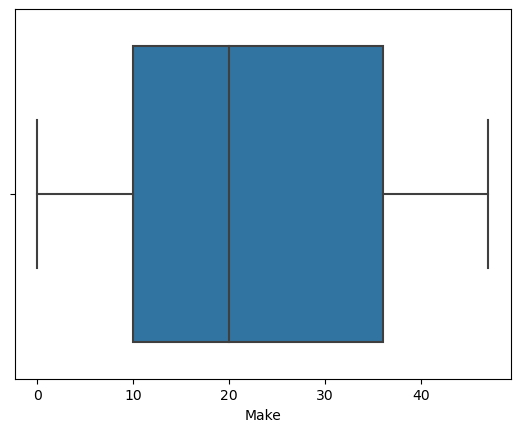

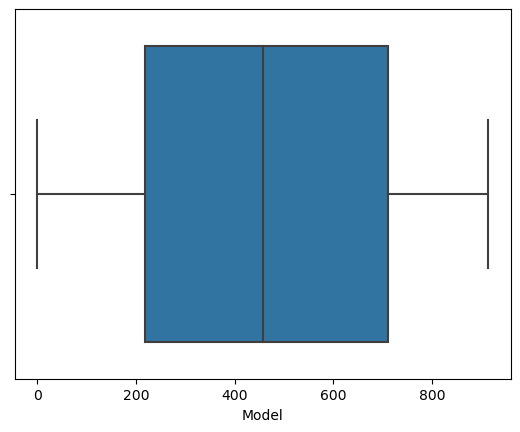

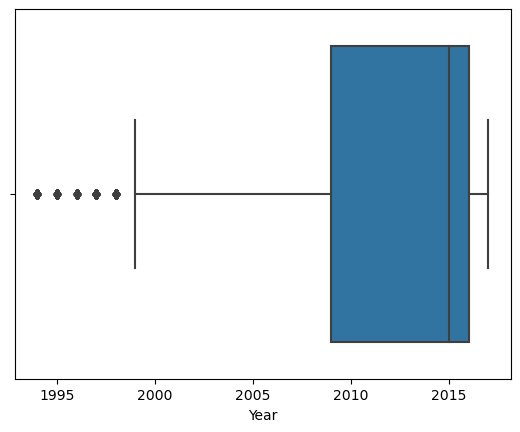

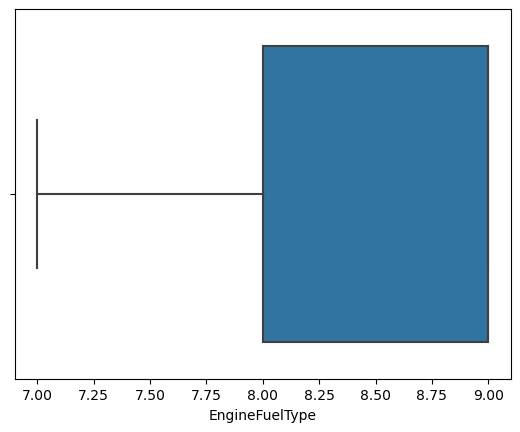

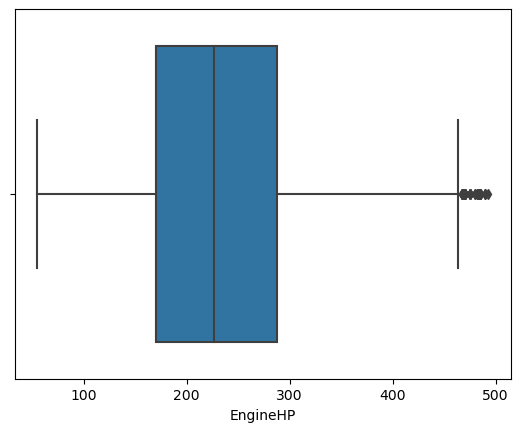

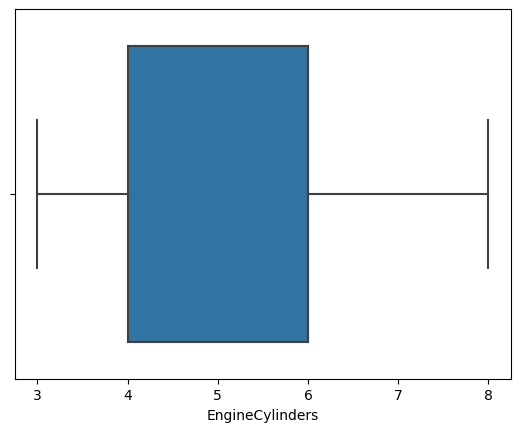

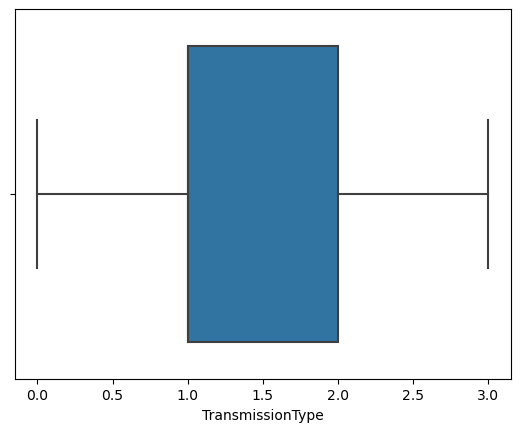

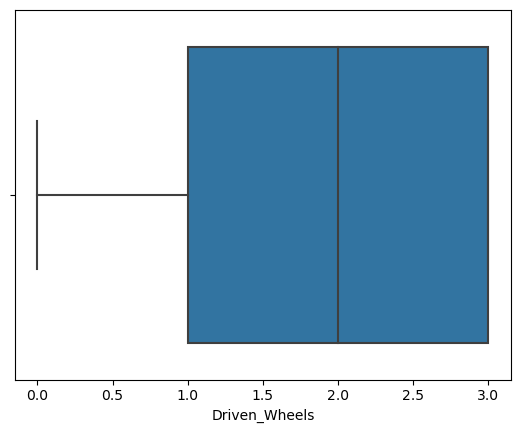

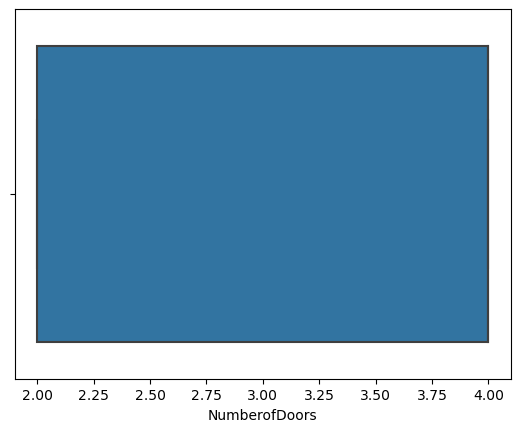

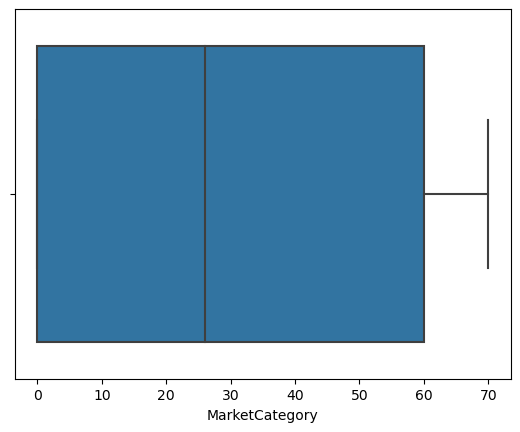

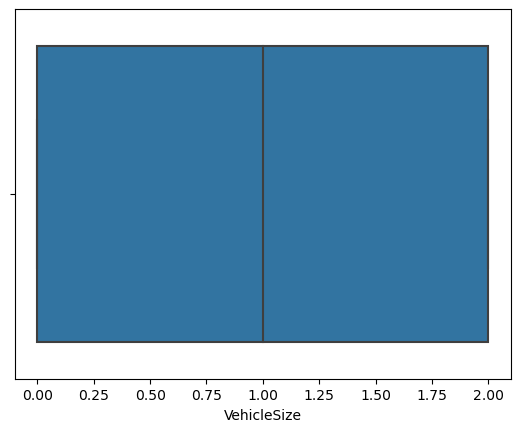

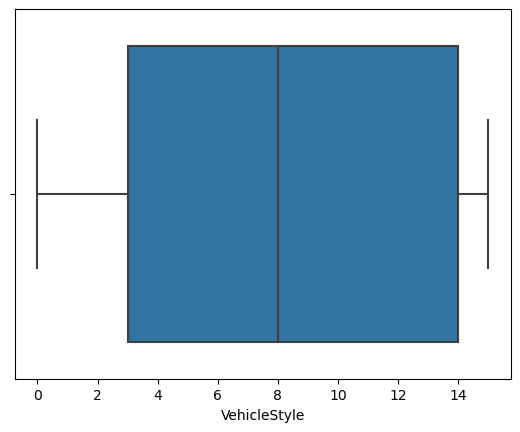

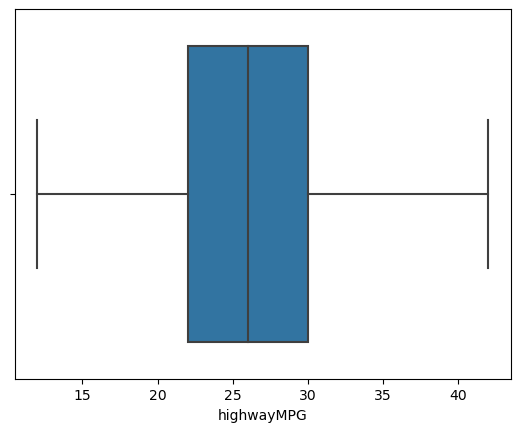

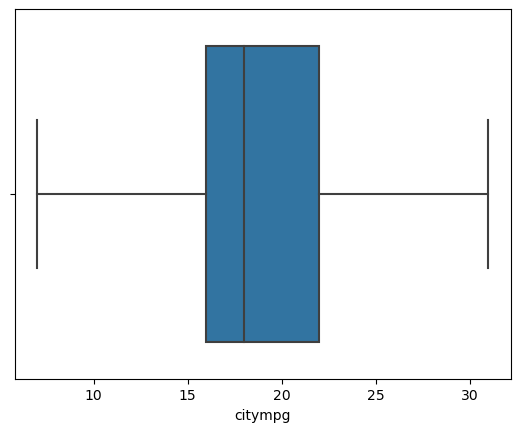

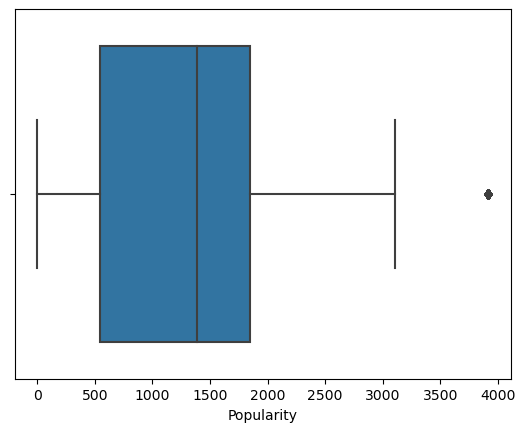

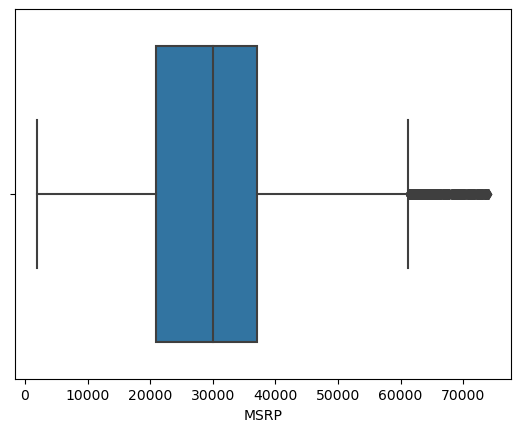

In [81]:
for i in ds:
    sns.boxplot(x=ds[i])
    plt.show()

### Splitting the Data for Testing and Training

In [103]:
x = ds[['Popularity','Year','EngineHP','EngineCylinders','highwayMPG']]
y = ds['MSRP']

In [126]:
#normalizing the data

from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [127]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [128]:
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [129]:
model=lr.fit(x_train,y_train)

In [136]:
y_pred=model.predict(x_test)

In [137]:
from sklearn.metrics import mean_squared_error,r2_score

print("MSE =",mean_squared_error(y_test,y_pred))

print("R2 =",r2_score(y_test,y_pred))

MSE = 97901646.46990399
R2 = 0.5775529033178606


In [138]:
y_pred=model.predict(x_test)

In [132]:
y_pred

array([27285.40061678, 28202.76405609, 33046.75972244, ...,
       24514.94036108, 24632.515937  , 33311.85061735])

Text(0, 0.5, 'Predicted Values')

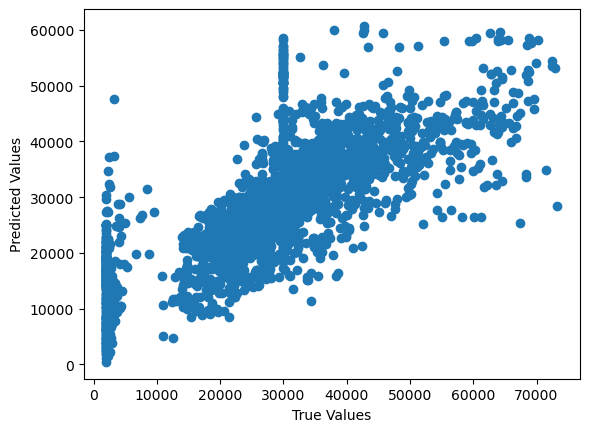

In [133]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

C:\Users\sribin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


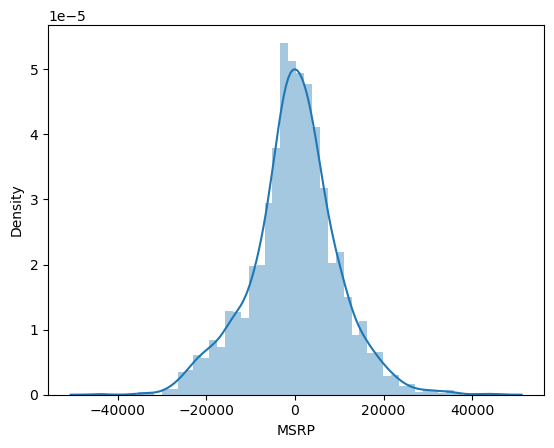

In [139]:
sns.distplot((y_test-y_pred),bins=50)
plt.show()